In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [50]:
c_df = pd.read_csv('Resources/crypto_data.csv')
c_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [51]:
c_df.shape

(1252, 7)

In [52]:
c_df.value_counts()

Unnamed: 0  CoinName     Algorithm    IsTrading  ProofType  TotalCoinsMined  TotalCoinSupply
1337        EliteCoin    X13          True       PoW/PoS    2.927942e+10     314159265359       1
POKER       PokerCoin    Scrypt       False      PoS/PoW    0.000000e+00     466666667          1
PKB         ParkByte     SHA-256      True       PoW/PoS    0.000000e+00     25000000           1
PLNC        PLNCoin      Scrypt       True       PoW/PoS    1.708960e+07     38540000           1
PLTC        PlatinCoin   CryptoNight  True       PoW        8.430000e+04     600000518          1
                                                                                               ..
FAIR        FairCoin     Groestl      True       PoW/PoS    5.319383e+07     0                  1
FC2         Fuel2Coin    X11          True       PoS        0.000000e+00     100000000          1
FCN         FantomCoin   CryptoNight  True       PoW        0.000000e+00     18400000           1
FIBRE       FIBRE        

In [53]:
c_df = c_df[c_df['IsTrading'] == True]
c_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [54]:
c_df = c_df.drop(columns ='IsTrading')
c_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [55]:
c_df.isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [56]:
c_df = c_df.dropna()
c_df.isnull().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [57]:
c_df = c_df[c_df["TotalCoinsMined"]> 0]
c_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [58]:
CoinName=pd.DataFrame(c_df['CoinName']).reset_index(drop=True)
CoinName

,CoinName
0,42 Coin
1,404Coin
2,EliteCoin
3,Bitcoin
4,Ethereum
...,...
527,ZEPHYR
528,Gapcoin
529,Beldex
530,Horizen


In [59]:
c_df.drop(columns='CoinName', axis=1, inplace= True)
c_df

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [60]:
c_df = c_df.drop(columns=['Unnamed: 0'])
c_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [61]:
X = pd.get_dummies(c_df, columns=['Algorithm', 'ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
X.columns

Index(['TotalCoinsMined', 'TotalCoinSupply',
       'Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algor

In [63]:
scaler = StandardScaler()
c_scaled = scaler.fit_transform(X)
len(X.columns)

98

In [64]:
pca = PCA(n_components=4)
c_pca = pca.fit_transform(c_scaled)
c_pca_df = pd.DataFrame(data=c_pca, 
                             columns=["PC 1", "PC 2", "PC 3", "PC4"])
c_pca_df.head()

,PC 1,PC 2,PC 3,PC4
0,-0.323063,1.067790,-0.611233,0.028606
1,-0.306392,1.067974,-0.611667,0.028627
2,2.296432,1.651053,-0.669487,0.005645
3,-0.138184,-1.347248,0.196232,0.006287
4,-0.147911,-2.100997,0.352373,-0.005581


In [65]:
pca.explained_variance_ratio_

array([0.02793023, 0.02140777, 0.0205068 , 0.0204432 ])

In [66]:
pca2 = PCA(n_components=.90)

c_pca = pca2.fit_transform(c_scaled)
c_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         7.87306563e-16, -1.84616729e-18, -4.15361072e-15],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         1.17409449e-15,  5.25116470e-16, -3.80497340e-15],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
         2.75207903e-14, -2.36464424e-14,  2.84400186e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
         1.93578889e-14, -8.67896697e-15, -3.66917605e-14],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
        -1.78255127e-15, -2.03579310e-16, -4.38160754e-16],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
        -4.70588149e-16, -9.07306180e-17, -2.78763670e-15]])

In [67]:
c_pca_df = pd.DataFrame(data=c_pca)
c_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,2.734816e-12,-5.417255e-15,-1.223976e-16,-0.007129,-1.319756,-0.051813,...,7.930746e-17,1.066184e-15,2.929092e-15,-7.260564e-16,-1.958946e-15,1.858141e-15,-1.863509e-15,7.873066e-16,-1.846167e-18,-4.153611e-15
1,-0.318434,1.032331,-0.591126,0.001386,2.712386e-12,-5.575109e-15,-2.141355e-16,-0.007739,-1.322514,-0.056674,...,5.236227e-17,3.558103e-16,3.123007e-15,-5.243003e-17,-1.703046e-15,1.069014e-15,-1.856951e-15,1.174094e-15,5.251165e-16,-3.804973e-15
2,2.305468,1.656383,-0.683617,0.004731,9.322259e-12,-6.700325e-15,7.872127e-15,-0.054781,-1.542879,-0.943951,...,3.638111e-14,-1.841986e-14,-5.521324e-14,-7.303804e-14,2.329683e-14,-3.527460e-14,3.114482e-14,2.752079e-14,-2.364644e-14,2.844002e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-2.420624e-12,2.357806e-15,-1.697979e-15,-0.002071,0.281463,0.251862,...,4.765898e-15,2.352318e-17,-2.522688e-14,6.604406e-15,-9.542520e-15,-1.391009e-14,2.591484e-15,2.225494e-15,4.614234e-15,4.660314e-15
4,-0.151768,-2.036192,0.396182,-0.001705,-3.352037e-12,2.706411e-15,-1.587523e-15,0.027735,0.519099,0.188820,...,-3.035501e-14,6.137487e-14,-3.172419e-14,-3.873903e-14,-7.522860e-14,-7.057959e-14,4.784940e-14,9.436182e-15,1.251016e-13,-3.544121e-15


In [68]:
pca.explained_variance_ratio_

array([0.02793023, 0.02140777, 0.0205068 , 0.0204432 ])

([<matplotlib.axis.XTick at 0x27604d1b910>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

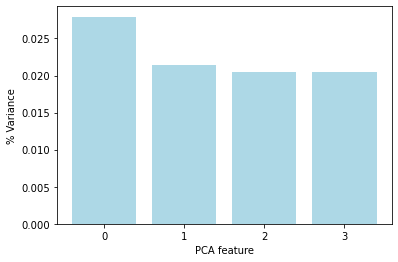

In [69]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='lightblue')
plt.xlabel('PCA feature')
plt.ylabel('% Variance')
plt.xticks(features)

In [70]:
len(c_pca_df.columns)

74

In [71]:
tsne = TSNE(learning_rate=35)

In [72]:
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(c_pca)
tsne_features.shape

(532, 2)

In [73]:
x = tsne_features[:,0]
y = tsne_features[:,1]

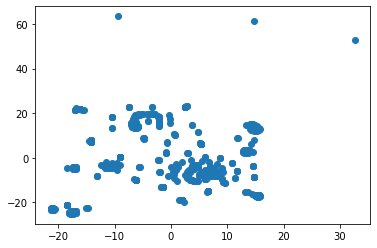

In [74]:
plt.scatter(x, y)
plt.show()

C:\Users\theri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


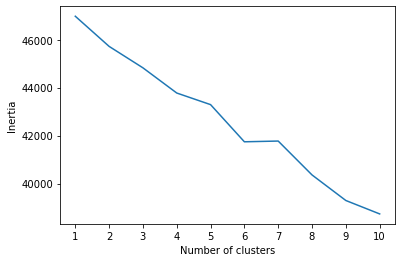

In [75]:
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(c_pca)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [76]:
df_elbow.head(10) 

,k,inertia
0,1,46979.075160
1,2,45721.481085
2,3,44826.964540
3,4,43776.296588
4,5,43291.951931
5,6,41741.618241
6,7,41772.266914
7,8,40359.106121
8,9,39292.407551
9,10,38732.722711


In [77]:
k_means_df = pd.DataFrame(tsne_features).reset_index(drop=True)
k_means_df

,0,1
0,-6.103900,13.474616
1,-2.237998,18.476007
2,-15.426077,21.458754
3,-17.844774,-24.025095
4,6.520207,-14.985663
...,...,...
527,-15.108383,-22.612738
528,-5.536754,19.241629
529,15.131735,-17.275434
530,1.940481,-18.843546


In [84]:
model = KMeans(n_clusters=6, random_state=81)
model.fit(k_means_df)
predictions = model.predict(k_means_df)

k_means_df["class"] = model.labels_
k_means_df.head()

,0,1,class
0,-6.103900,13.474616,3
1,-2.237998,18.476007,3
2,-15.426077,21.458754,3
3,-17.844774,-24.025095,5
4,6.520207,-14.985663,4


In [85]:
k_means_df['class'].value_counts()

4    185
3    131
2     87
1     77
5     49
0      3
Name: class, dtype: int64

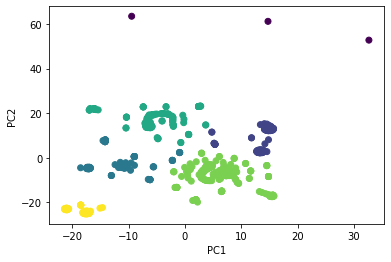

In [96]:
plt.scatter(k_means_df[0], k_means_df[1], c=k_means_df['class'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [97]:
final_df = pd.concat([CoinName, k_means_df],axis=1, sort=False)
final_df  

,CoinName,0,1,class
0,42 Coin,-6.103900,13.474616,3
1,404Coin,-2.237998,18.476007,3
2,EliteCoin,-15.426077,21.458754,3
3,Bitcoin,-17.844774,-24.025095,5
4,Ethereum,6.520207,-14.985663,4
...,...,...,...,...
527,ZEPHYR,-15.108383,-22.612738,5
528,Gapcoin,-5.536754,19.241629,3
529,Beldex,15.131735,-17.275434,4
530,Horizen,1.940481,-18.843546,4


In [98]:
class_one = final_df.loc[final_df['class'] == 1]
class_one.head()

,CoinName,0,1,class
6,Dash,14.119209,12.801236,1
16,Spreadcoin,12.818208,2.939385,1
33,CryptCoin,12.861663,2.533964,1
45,FeatherCoin,5.324691,6.034962,1
52,IOCoin,14.992484,12.705108,1


In [89]:
total_coins_mined_avg = c_df['TotalCoinsMined'].mean()
total_coins_mined_avg

5340455863.317298